In [92]:
import numpy as np
import xarray as xr
import os
import dask
import matplotlib as plt

In [93]:
allfiles = os.listdir()
ncs = [i for i in allfiles if '.nc' in i]

In [94]:
ncs

['cllcalipso_CFmon_CESM2_amip_r1i1p1f1_gn_200812-201412.nc',
 'clhcalipso_CFmon_CESM2_amip_r1i1p1f1_gn_200812-201412.nc',
 'clmcalipso_CFmon_CESM2_amip_r1i1p1f1_gn_200812-201412.nc',
 'cltcalipso_CFmon_CESM2_amip_r1i1p1f1_gn_200812-201412.nc']

In [95]:
name_dict = {'cllcalipso':'CLDLOW_CAL',
             'clhcalipso':'CLDHGH_CAL',
             'clmcalipso':'CLDMED_CAL',
             'cltcalipso':'CLDTOT_CAL'}

In [113]:
lat_bounds = [[-82,-70],[-70,-60],[-60,-50],[-50,-40],[-40,-30],
              [-30,-20],[-20,-10],[-10,0],[0,10],[10,20],[20,30],
              [30,40],[40,50],[50,60],[60,70],[70,82]]

In [96]:
ds = xr.Dataset()
for i in ncs:
    _var = i.split('_')[0]
    _ds = xr.open_dataset(i)
    ds[_var] = _ds[_var]
ds = ds.sel(time=slice('2009-06-01','2013-06-01'))
ds = ds.rename(name_dict)
ds['gw'] = np.cos(ds['lat']*np.pi/180)

In [170]:
def lat_averages(ds, var):
    avgs=[]
    da = ds[var].mean('lon')
    for low,high in lat_bounds:
        _sec = da.sel(lat=slice(low,high))
        _weights = ds['gw'].sel(lat=slice(low,high))
        
        out = weighted_mean(_sec, _weights, 'lat')
        print('%s average for %f to %f is %f' % (var, low, high, out))
        avgs+=[out.values]
    return avgs

In [171]:
def weighted_mean(da, weights, dims=None):
    normed_weights = weights / weights.sum()    
    _weighted_da = da*normed_weights
    avg = _weighted_da.sum(dims)
    
    return avg


In [162]:
doop = []
doop+=['hi']
print(doop)

['hi']


In [172]:
outs = lat_averages(ds.mean('time'),'CLDTOT_CAL')

CLDTOT_CAL average for -82.000000 to -70.000000 is 47.354812
CLDTOT_CAL average for -70.000000 to -60.000000 is 81.601632
CLDTOT_CAL average for -60.000000 to -50.000000 is 90.883086
CLDTOT_CAL average for -50.000000 to -40.000000 is 81.028740
CLDTOT_CAL average for -40.000000 to -30.000000 is 57.570553
CLDTOT_CAL average for -30.000000 to -20.000000 is 39.892393
CLDTOT_CAL average for -20.000000 to -10.000000 is 45.059990
CLDTOT_CAL average for -10.000000 to 0.000000 is 52.697611
CLDTOT_CAL average for 0.000000 to 10.000000 is 60.584454
CLDTOT_CAL average for 10.000000 to 20.000000 is 47.036449
CLDTOT_CAL average for 20.000000 to 30.000000 is 37.607211
CLDTOT_CAL average for 30.000000 to 40.000000 is 46.958145
CLDTOT_CAL average for 40.000000 to 50.000000 is 58.462560
CLDTOT_CAL average for 50.000000 to 60.000000 is 69.837137
CLDTOT_CAL average for 60.000000 to 70.000000 is 74.083556
CLDTOT_CAL average for 70.000000 to 82.000000 is 77.842762


In [173]:
outs

[array(47.35481213),
 array(81.60163152),
 array(90.88308575),
 array(81.02873975),
 array(57.57055305),
 array(39.89239315),
 array(45.05999012),
 array(52.69761109),
 array(60.5844543),
 array(47.03644884),
 array(37.60721091),
 array(46.95814451),
 array(58.4625602),
 array(69.83713715),
 array(74.08355555),
 array(77.84276226)]

In [83]:
ds_lonavg = ds.mean('lon')

TypeError: 'module' object is not callable

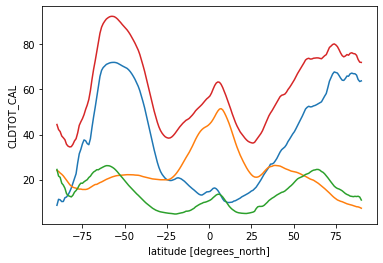

In [91]:
for i in ds_lonavg:
    ds_lonavg[i].mean('time').plot(label=i)
plt.legend()

In [71]:
ds_seas = ds.sortby('time.season')

In [74]:
ds_seas.time

<xarray.DataArray 'time' (time: 48)>
array([cftime.DatetimeNoLeap(2009, 12, 15, 12, 0, 0, 0, 5, 349),
       cftime.DatetimeNoLeap(2010, 1, 15, 12, 0, 0, 0, 1, 15),
       cftime.DatetimeNoLeap(2010, 2, 14, 0, 0, 0, 0, 3, 45),
       cftime.DatetimeNoLeap(2010, 12, 15, 12, 0, 0, 0, 6, 349),
       cftime.DatetimeNoLeap(2011, 1, 15, 12, 0, 0, 0, 2, 15),
       cftime.DatetimeNoLeap(2011, 2, 14, 0, 0, 0, 0, 4, 45),
       cftime.DatetimeNoLeap(2011, 12, 15, 12, 0, 0, 0, 0, 349),
       cftime.DatetimeNoLeap(2012, 1, 15, 12, 0, 0, 0, 3, 15),
       cftime.DatetimeNoLeap(2012, 2, 14, 0, 0, 0, 0, 5, 45),
       cftime.DatetimeNoLeap(2012, 12, 15, 12, 0, 0, 0, 1, 349),
       cftime.DatetimeNoLeap(2013, 1, 15, 12, 0, 0, 0, 4, 15),
       cftime.DatetimeNoLeap(2013, 2, 14, 0, 0, 0, 0, 6, 45),
       cftime.DatetimeNoLeap(2009, 6, 15, 0, 0, 0, 0, 4, 166),
       cftime.DatetimeNoLeap(2009, 7, 15, 12, 0, 0, 0, 6, 196),
       cftime.DatetimeNoLeap(2009, 8, 15, 12, 0, 0, 0, 2, 227),
       cftim

In [72]:
for i in ds_seas:
    _avg = i.mean('time')
    _avg.plot()

AttributeError: 'str' object has no attribute 'mean'

In [53]:
obs = xr.open_mfdataset(ncs)

In [38]:
obs

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 192, lon: 288, time: 73)
Coordinates:
  * time        (time) object 2008-12-15 12:00:00 ... 2014-12-15 12:00:00
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (time, bnds) object 2008-12-01 00:00:00 ... 2015-01-01 00:00:00
    lon_bnds    (lon, bnds) float64 -0.625 0.625 0.625 ... 358.1 358.1 359.4
    lat_bnds    (lat, bnds) float64 -90.0 -89.53 -89.53 ... 89.53 89.53 90.0
    clhcalipso  (time, lat, lon) float32 ...
    cllcalipso  (time, lat, lon) float32 ...
    clmcalipso  (time, lat, lon) float32 ...
    cltcalipso  (time, lat, lon) float32 ...
Attributes:
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Apr 21 11:38:27 2020: cdo seltimestep,708/780...
    source:                 CESM2 (2017):

In [51]:
obs[:,:,1]

TypeError: unhashable type: 'slice'

In [39]:
obs.sel(time=slice('2009-06-01','2013-06-01'))

TypeError: Invalid array type: <class 'dask.array.core.Array'>

In [35]:
obs['clhcalipso']

<xarray.DataArray 'clhcalipso' (time: 73, lat: 192, lon: 288)>
[4036608 values with dtype=float32]
Coordinates:
  * time     (time) object 2008-12-15 12:00:00 ... 2014-12-15 12:00:00
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    standard_name:  cloud_area_fraction_in_atmosphere_layer
    long_name:      CALIPSO High Level Cloud Area Percentage
    units:          %
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        Percentage cloud cover in layer centred on 220hPa
    description:    Percentage cloud cover in layer centred on 220hPa
    frequency:      mon
    id:             clhcalipso
    mipTable:       CFmon
    out_name:       clhcalipso
    prov:           CFmon ((isd.003))
    realm:          atmos
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          CALIPS

In [25]:
obs.sel(time=slice('2009-06-01','2013-06-01'))

TypeError: Invalid array type: <class 'dask.array.core.Array'>

In [41]:
tt = xr.open_dataset(ncs[0])

In [43]:
ttt = tt.sel(time=slice('2009-06-01','2013-06-01'))

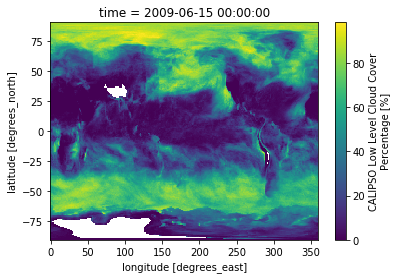

In [48]:
u = ttt.isel(time=0)['cllcalipso'].plot()

In [55]:
ttt['cllcalipso']

<xarray.DataArray 'cllcalipso' (time: 48, lat: 192, lon: 288)>
[2654208 values with dtype=float32]
Coordinates:
  * time     (time) object 2009-06-15 00:00:00 ... 2013-05-15 12:00:00
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    standard_name:  cloud_area_fraction_in_atmosphere_layer
    long_name:      CALIPSO Low Level Cloud Cover Percentage
    units:          %
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        Percentage cloud cover in layer centred on 840hPa
    description:    Percentage cloud cover in layer centred on 840hPa
    frequency:      mon
    id:             cllcalipso
    mipTable:       CFmon
    out_name:       cllcalipso
    prov:           CFmon ((isd.003))
    realm:          atmos
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          CALIPS